# Visualization Functions
 **By Ming Choi, Version 20190526**

This is a collection of useful data analysis and visualization functions. The demo data used is from Kaggle **_Telecom Customer Churn Prediction_** dataset. (Size: 46.2 MB, Link: https://www.kaggle.com/abhinav89/telecom-customer/downloads/telecom-customer.zip/1)

In [1]:
import sys
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import cleanser, analyzer

%matplotlib inline 
plt.style.use('ggplot')
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
matplotlib.rcParams['figure.figsize'] = (12, 8)

C:\Users\Ming\Anaconda3\envs\py34\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Load data
df = pd.read_csv("Telecom_customer churn.csv", dtype=object, delimiter=',', skipinitialspace=True, skip_blank_lines=True, encoding="ISO-8859-1")
df.shape

(100000, 100)

In [3]:
# Auto analyze columns/features
cleanser.analyze(df)

'rev_Mean':	['float', '', ''],	
'mou_Mean':	['float', '', ''],	
'totmrc_Mean':	['float', '', ''],	
'da_Mean':	['float', '', ''],	
'ovrmou_Mean':	['float', '', ''],	
'ovrrev_Mean':	['float', '', ''],	
'vceovr_Mean':	['float', '', ''],	
'datovr_Mean':	['binary', '', ''],	# TODO: HAS NAN 0.4% ???
'roam_Mean':	['float', '', ''],	
'change_mou':	['float', '', ''],	
'change_rev':	['float', '', ''],	
'drop_vce_Mean':	['float', '', ''],	
'drop_dat_Mean':	['binary', '', ''],	
'blck_vce_Mean':	['float', '', ''],	
'blck_dat_Mean':	['binary', '', ''],	
'unan_vce_Mean':	['float', '', ''],	
'unan_dat_Mean':	['binary', '', ''],	
'plcd_vce_Mean':	['float', '', ''],	
'plcd_dat_Mean':	['binary', '', ''],	
'recv_vce_Mean':	['float', '', ''],	
'recv_sms_Mean':	['binary', '', ''],	
'comp_vce_Mean':	['float', '', ''],	
'comp_dat_Mean':	['binary', '', ''],	
'custcare_Mean':	['float', '', ''],	
'ccrndmou_Mean':	['float', '', ''],	
'cc_mou_Mean':	['float', '', ''],	
'inonemin_Mean':	['float', '', ''],	
'threewa

In [4]:
settings = {
    'rev_Mean':	['float', '', ''],	
    'mou_Mean':	['float', '', ''],	
    'totmrc_Mean':	['float', '', ''],	
    'da_Mean':	['float', '', ''],	
    'ovrmou_Mean':	['float', '', ''],	
    'ovrrev_Mean':	['float', '', ''],	
    'vceovr_Mean':	['float', '', ''],	
    'datovr_Mean':	['binary', '', ''],	# TODO: HAS NAN 0.4% ???
    'roam_Mean':	['float', '', ''],	
    'change_mou':	['float', '', ''],	
    'change_rev':	['float', '', ''],	
    'drop_vce_Mean':	['float', '', ''],	
    'drop_dat_Mean':	['binary', '', ''],	
    'blck_vce_Mean':	['float', '', ''],	
    'blck_dat_Mean':	['binary', '', ''],	
    'unan_vce_Mean':	['float', '', ''],	
    'unan_dat_Mean':	['binary', '', ''],	
    'plcd_vce_Mean':	['float', '', ''],	
    'plcd_dat_Mean':	['binary', '', ''],	
    'recv_vce_Mean':	['float', '', ''],	
    'recv_sms_Mean':	['binary', '', ''],	
    'comp_vce_Mean':	['float', '', ''],	
    'comp_dat_Mean':	['binary', '', ''],	
    'custcare_Mean':	['float', '', ''],	
    'ccrndmou_Mean':	['float', '', ''],	
    'cc_mou_Mean':	['float', '', ''],	
    'inonemin_Mean':	['float', '', ''],	
    'threeway_Mean':	['float', '', ''],	
    'mou_cvce_Mean':	['float', '', ''],	
    'mou_cdat_Mean':	['binary', '', ''],	
    'mou_rvce_Mean':	['float', '', ''],	
    'owylis_vce_Mean':	['float', '', ''],	
    'mouowylisv_Mean':	['float', '', ''],	
    'iwylis_vce_Mean':	['float', '', ''],	
    'mouiwylisv_Mean':	['float', '', ''],	
    'peak_vce_Mean':	['float', '', ''],	
    'peak_dat_Mean':	['binary', '', ''],	
    'mou_peav_Mean':	['float', '', ''],	
    'mou_pead_Mean':	['binary', '', ''],	
    'opk_vce_Mean':	['float', '', ''],	
    'opk_dat_Mean':	['binary', '', ''],	
    'mou_opkv_Mean':	['float', '', ''],	
    'mou_opkd_Mean':	['binary', '', ''],	
    'drop_blk_Mean':	['float', '', ''],	
    'attempt_Mean':	['float', '', ''],	
    'complete_Mean':	['float', '', ''],	
    'callfwdv_Mean':	['binary', '', ''],	
    'callwait_Mean':	['float', '', ''],	
    'churn':	['binary', '', ''],	
    'months':	['int', '', ''],	
    'uniqsubs':	['class', '', ''],	# 0.01 % int unique ---------------
    'actvsubs':	['class', '', ''],	# 0.01 % int unique ---------------
    'new_cell':	['class', '', ''],	
    'crclscod':	['drop', '', ''],	# 0.05 % str unique XXXXXXXXXXXXX
    'asl_flag':	['binary', '', ''],	
    'totcalls':	['int', '', ''],	
    'totmou':	['int', '', ''],	
    'totrev':	['float', '', ''],	
    'adjrev':	['float', '', ''],	
    'adjmou':	['int', '', ''],	
    'adjqty':	['int', '', ''],	
    'avgrev':	['float', '', ''],	
    'avgmou':	['float', '', ''],	
    'avgqty':	['float', '', ''],	
    'avg3mou':	['int', '', ''],	
    'avg3qty':	['int', '', ''],	
    'avg3rev':	['int', '', ''],	
    'avg6mou':	['int', '', ''],	
    'avg6qty':	['int', '', ''],	
    'avg6rev':	['int', '', ''],	
    'prizm_social_one':	['class', '', ''],	
    'area':	['class', '', ''],	
    'dualband':	['binary', '', ''],	
    'refurb_new':	['class', '', ''],	
    'hnd_price':	['float', '', ''],	
    'phones':	['class', '', ''],	# 0.02 % int unique ---------------
    'models':	['class', '', ''],	# 0.01 % int unique ---------------
    'hnd_webcap':	['class', '', ''],	
    'truck':	['binary', '', ''],	# TODO: HAS NAN 1.7% ???
    'rv':	['binary', '', ''],	# TODO: HAS NAN 1.7% ???
    'ownrent':	['class', '', ''],	
    'lor':	['class', '', ''],	# 0.02 % int unique ---------------
    'dwlltype':	['class', '', ''],	
    'marital':	['class', '', ''],	
    'adults':	['class', '', ''],	# 0.01 % int unique ---------------
    'infobase':	['class', '', ''],	
    'income':	['class', '', ''],	# 0.01 % int unique ---------------
    'numbcars':	['class', '', ''],	# 0.0 % int unique ---------------
    'HHstatin':	['class', '', ''],	
    'dwllsize':	['class', '', ''],	
    'forgntvl':	['binary', '', ''],	# TODO: HAS NAN 1.7% ???
    'ethnic':	['class', '', ''],	
    'kid0_2':	['class', '', ''],	
    'kid3_5':	['class', '', ''],	
    'kid6_10':	['class', '', ''],	
    'kid11_15':	['class', '', ''],	
    'kid16_17':	['class', '', ''],	
    'creditcd':	['binary', '', ''],	# TODO: HAS NAN 1.7% ???
    'eqpdays':	['int', '', ''],	
    'Customer_ID':	['drop', '', ''],	# 100.0 % int unique XXXXXXXXXXXX
}

In [5]:
# Auto clean data accordingly
df = cleanser.clean_data(df, settings, 0)

display(df.shape)
display(df.head())

(100000, 98)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0,0.0,-157.25,-18.9975,0.666667,0,0.666667,0,6.333333,0,52.333333,0,42.333333,0,45.000000,0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0,132.600000,0,24.000000,0,55.220000,0,1.333333,52.333333,45.000000,0,0.333333,1,61,2,1,U,0,1652,4228,1504.62,1453.44,4085,1602,29.66,83.37,32.69,272,116,30,322,136,38,S,NORTHWEST/ROCKY MOUNTAIN AREA,1,N,149.989990,2,2,WCMB,0,0,O,15,S,S,1,M,4,3,C,A,0,N,U,U,U,U,U,1,361
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0,0.0,532.25,50.9875,8.333333,0,1.000000,0,61.333333,0,263.333333,0,69.000000,0,193.333333,0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0,75.333333,0,157.000000,0,169.343333,0,9.333333,263.333333,193.333333,0,5.666667,0,56,1,1,N,0,14654,26400,2851.68,2833.88,26367,14624,51.53,479.40,265.89,305,158,40,477,275,48,U,CHICAGO AREA,0,N,101.875763,7,6,WC,1,1,Missing,1,S,S,1,M,5,1,C,A,0,Z,U,U,U,U,U,1,240
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0,0.0,-4.25,0.0000,0.333333,0,0.000000,0,2.666667,0,9.000000,0,0.333333,0,6.000000,0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0,5.193333,0,1.000000,0,0.233333,0,0.333333,9.000000,6.000000,0,0.000000,1,58,1,1,Y,0,7903,24385,2155.91,1934.47,24303,7888,34.54,433.98,140.86,12,7,17,11,6,17,S,GREAT LAKES AREA,0,N,29.989990,2,1,Missing,0,0,O,7,S,M,2,M,5,2,C,A,0,N,U,Y,U,U,U,1,1504
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0,0.0,-1.50,0.0000,0.000000,0,0.000000,0,0.000000,0,3.666667,0,1.333333,0,3.666667,0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0,3.380000,0,3.666667,0,5.450000,0,0.000000,3.666667,3.666667,0,0.000000,0,60,1,1,Y,0,1502,3065,2000.90,1941.81,3035,1479,40.45,63.23,30.81,8,3,38,50,25,40,T,CHICAGO AREA,0,N,29.989990,1,1,Missing,0,0,Missing,6,M,M,4,M,6,1,C,D,0,U,Y,U,U,U,U,1,1812
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0,0.0,38.50,0.0000,9.666667,0,0.666667,0,77.000000,0,222.333333,0,94.666667,0,137.000000,0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0,173.476667,0,90.333333,0,218.086667,0,10.333333,222.333333,137.000000,0,0.000000,0,57,1,1,Y,0,4485,14028,2181.12,2166.48,13965,4452,38.69,249.38,79.50,558,191,55,586,196,80,U,NEW ENGLAND AREA,1,N,149.989990,6,4,WCMB,0,0,R,5,M,S,1,M,6,1,C,O,0,I,U,U,U,U,U,1,434


In [6]:
# Show data basic statistics
display(df.head())
display(df.describe(exclude=[np.number]))
display(df.describe())

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0,0.0,-157.25,-18.9975,0.666667,0,0.666667,0,6.333333,0,52.333333,0,42.333333,0,45.000000,0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0,132.600000,0,24.000000,0,55.220000,0,1.333333,52.333333,45.000000,0,0.333333,1,61,2,1,U,0,1652,4228,1504.62,1453.44,4085,1602,29.66,83.37,32.69,272,116,30,322,136,38,S,NORTHWEST/ROCKY MOUNTAIN AREA,1,N,149.989990,2,2,WCMB,0,0,O,15,S,S,1,M,4,3,C,A,0,N,U,U,U,U,U,1,361
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0,0.0,532.25,50.9875,8.333333,0,1.000000,0,61.333333,0,263.333333,0,69.000000,0,193.333333,0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0,75.333333,0,157.000000,0,169.343333,0,9.333333,263.333333,193.333333,0,5.666667,0,56,1,1,N,0,14654,26400,2851.68,2833.88,26367,14624,51.53,479.40,265.89,305,158,40,477,275,48,U,CHICAGO AREA,0,N,101.875763,7,6,WC,1,1,Missing,1,S,S,1,M,5,1,C,A,0,Z,U,U,U,U,U,1,240
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0,0.0,-4.25,0.0000,0.333333,0,0.000000,0,2.666667,0,9.000000,0,0.333333,0,6.000000,0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0,5.193333,0,1.000000,0,0.233333,0,0.333333,9.000000,6.000000,0,0.000000,1,58,1,1,Y,0,7903,24385,2155.91,1934.47,24303,7888,34.54,433.98,140.86,12,7,17,11,6,17,S,GREAT LAKES AREA,0,N,29.989990,2,1,Missing,0,0,O,7,S,M,2,M,5,2,C,A,0,N,U,Y,U,U,U,1,1504
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0,0.0,-1.50,0.0000,0.000000,0,0.000000,0,0.000000,0,3.666667,0,1.333333,0,3.666667,0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0,3.380000,0,3.666667,0,5.450000,0,0.000000,3.666667,3.666667,0,0.000000,0,60,1,1,Y,0,1502,3065,2000.90,1941.81,3035,1479,40.45,63.23,30.81,8,3,38,50,25,40,T,CHICAGO AREA,0,N,29.989990,1,1,Missing,0,0,Missing,6,M,M,4,M,6,1,C,D,0,U,Y,U,U,U,U,1,1812
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0,0.0,38.50,0.0000,9.666667,0,0.666667,0,77.000000,0,222.333333,0,94.666667,0,137.000000,0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0,173.476667,0,90.333333,0,218.086667,0,10.333333,222.333333,137.000000,0,0.000000,0,57,1,1,Y,0,4485,14028,2181.12,2166.48,13965,4452,38.69,249.38,79.50,558,191,55,586,196,80,U,NEW ENGLAND AREA,1,N,149.989990,6,4,WCMB,0,0,R,5,M,S,1,M,6,1,C,O,0,I,U,U,U,U,U,1,434


,uniqsubs,actvsubs,new_cell,prizm_social_one,area,refurb_new,phones,models,hnd_webcap,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,15,12,3,6,20,3,25,15,4,3,17,3,6,7,3,10,4,7,16,18,3,3,3,3,3
top,1,1,U,S,NEW YORK CITY AREA,N,1,1,WCMB,O,Missing,S,U,2,M,Missing,Missing,C,A,N,U,U,U,U,U
freq,61966,70524,66914,32097,11098,85593,57277,63273,75733,64284,30190,48759,37333,23045,77697,25436,49366,39124,47205,33389,94256,93572,90195,89454,88304


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,dualband,hnd_price,truck,rv,forgntvl,creditcd,eqpdays
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.000020,1.286405,-13.933818,-1.021067,5.955085,0.00218,4.022917,0.001060,27.784905,0.002340,144.881677,0.011680,55.085152,0.000750,108.892535,0.009970,1.790838,4.666880,3.683328,29.766550,0.284720,227.763520,0.0001,111.654562,24.753320,28.467865,7.894360,18.193037,88.480285,0.00673,174.080788,0.000080,66.003498,0.00742,165.280703,0.000060,10.044298,145.752225,109.666977,0.000300,1.782928,0.495620,18.833990,0.139360,2877.141930,7648.362390,1031.924988,960.111528,7546.313300,2836.366920,57.913832,483.726493,173.554507,519.641210,180.337320,59.193330,495.166050,173.301370,57.017590,0.722650,101.875763,0.185550,0.081150,0.056970,0.672340,391.928390
std,46.208972,524.229868,23.581283,2.173729,97.122320,30.446392,30.002391,0.004472,14.685090,274.854774,50.138337,8.954715,0.04664,10.672202,0.032541,38.358734,0.048317,158.267711,0.107442,86.841198,0.027376,118.580079,0.099351,5.315570,12.761953,10.539981,55.833753,1.092101,264.403894,0.0100,162.691285,34.414822,48.962903,16.145590,41.421462,103.066103,0.08176,207.673553,0.008944,91.456885,0.08582,237.332918,0.007746,15.418406,159.348094,119.594305,0.017318,5.353953,0.499983,9.655794,0.346324,3790.863474,8666.552025,852.907511,840.170815,8594.883577,3756.513882,36.161292,438.485213,167.824576,533.634073,192.725835,46.695429,496.825743,182.532009,41.341163,0.447693,60.746760,0.388745,0.273067,0.231786,0.469362,256.483905
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,3.650000,2.400000,0.000000,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,9.989998,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,33.311875,151.5

In [7]:
# Perform one hot encoding according to column types
df = cleanser.one_hot(df, settings, logging=False)

display(df.shape)
display(df.head())

(100000, 260)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,...,numbcars_3,numbcars_Missing,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_Missing,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_Missing,dwllsize_N,dwllsize_O,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_Missing,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_U,kid0_2_Y,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0,0.0,-157.25,-18.9975,0.666667,0,0.666667,0,6.333333,0,52.333333,0,42.333333,0,45.000000,0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0,132.600000,0,24.000000,0,55.220000,0,1.333333,52.333333,45.000000,0,0.333333,1,61,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0,0.0,532.25,50.9875,8.333333,0,1.000000,0,61.333333,0,263.333333,0,69.000000,0,193.333333,0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0,75.333333,0,157.000000,0,169.343333,0,9.333333,263.333333,193.333333,0,5.666667,0,56,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0,0.0,-4.25,0.0000,0.333333,0,0.000000,0,2.666667,0,9.000000,0,0.333333,0,6.000000,0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0,5.193333,0,1.000000,0,0.233333,0,0.333333,9.000000,6.000000,0,0.000000,1,58,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0,0.0,-1.50,0.0000,0.000000,0,0.000000,0,0.000000,0,3.666667,0,1.333333,0,3.666667,0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0,3.380000,0,3.666667,0,5.450000,0,0.000000,3.666667,3.666667,0,0.000000,0,60,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0,0.0,38.50,0.0000,9.666667,0,0.666667,0,77.000000,0,222.333333,0,94.666667,0,137.000000,0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0,173.476667,0,90.333333,0,218.086667,0,10.333333,222.333333,137.000000,0,0.000000,0,57,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [8]:
# Split data for ML Model analysis
X = df.loc[:, df.columns != 'churn']
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
                
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80000, 259)
y_train (80000,)
X_test (20000, 259)
y_test (20000,)


------
# Visualization

In [9]:
# Plot correlation matrix of the features
def plot_corr(df):
    sns.set(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(40, 32))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

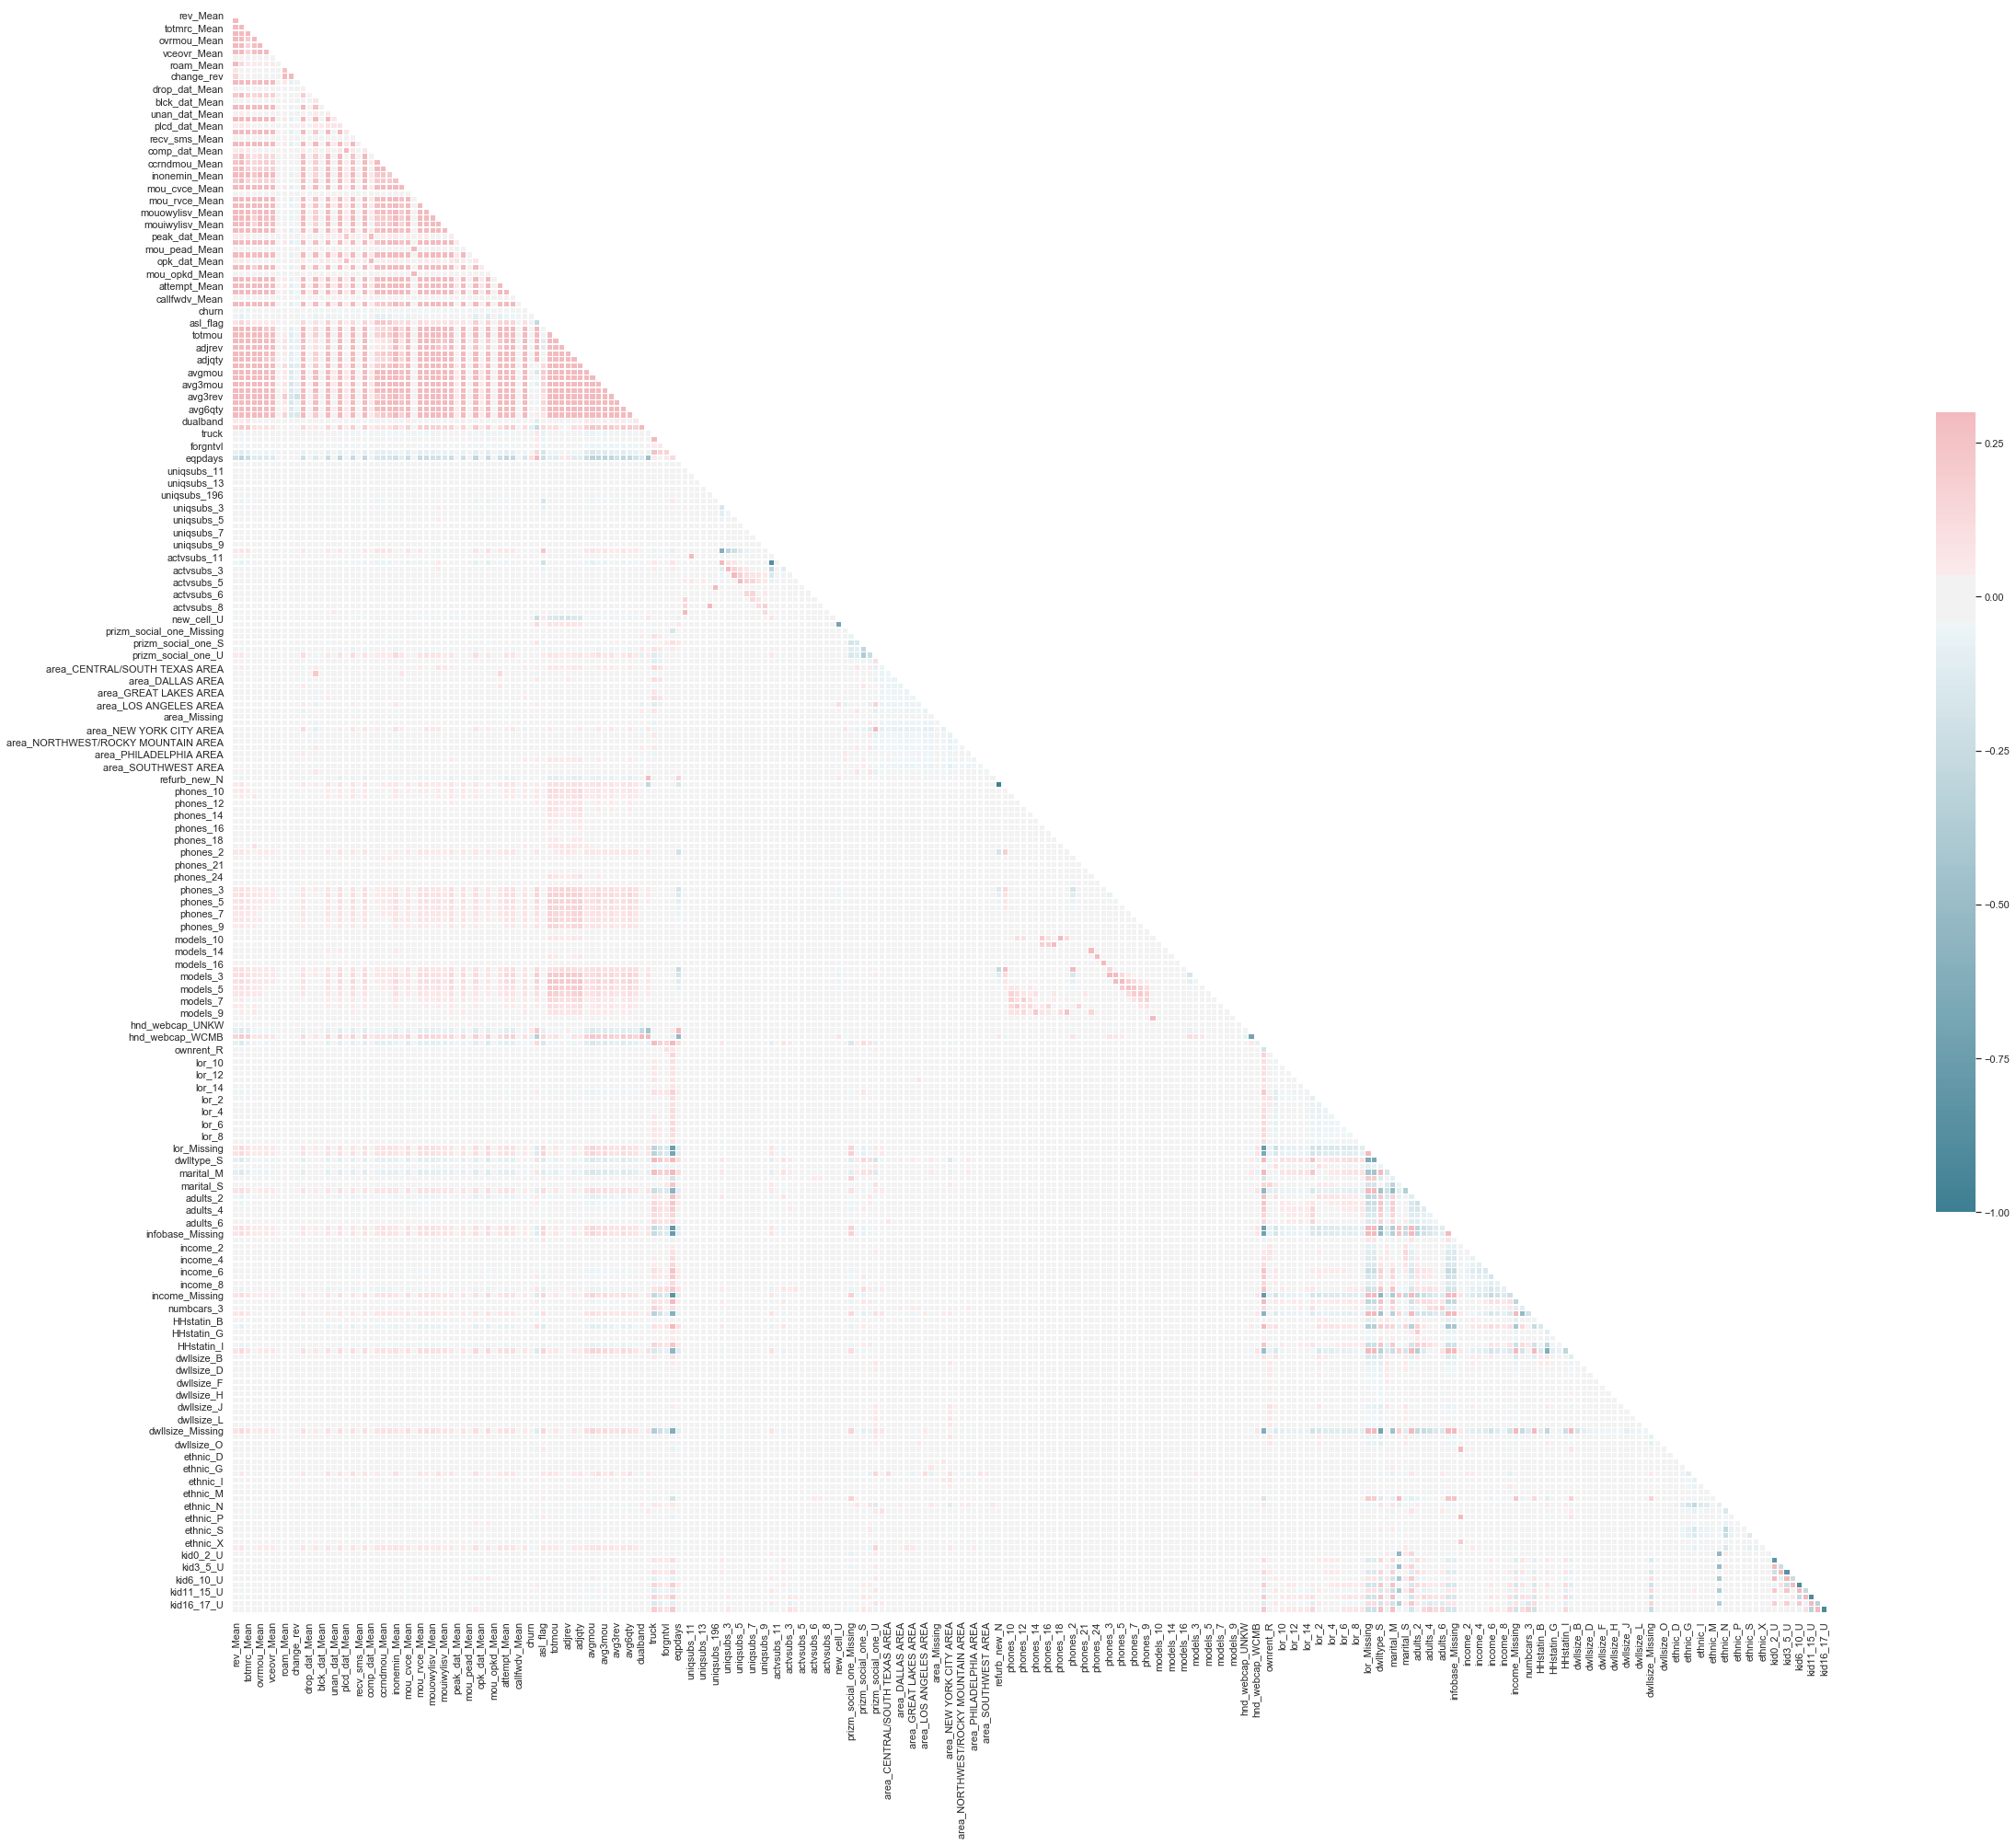

In [10]:
plot_corr(df)

In [11]:
# Plot distribution of data, w.r.t. target label if column type is a class
def plot_dist(df, target):
    def y_fmt(y, pos):
        decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
        suffix  = ["G", "M", "K", "" , "m" , "u", "n"  ]
        if y == 0:
            return str(0)
        for i, d in enumerate(decades):
            if np.abs(y) >=d:
                val = y/float(d)
                signf = len(str(val).split(".")[1])
                if signf == 0:
                    return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
                else:
                    if signf == 1:
                        if str(val).split(".")[1] == "0":
                            return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                    tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                    return tx.format(val=val, suffix=suffix[i])

                    #return y
        return y
    
    n = 0
    plot_per_line = 4
    
    color_pal = sns.color_palette("muted")
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    for col in df:
        if df[col].dtype in numerics:
            plt_type = 'dist'
        elif df[col].dtype == 'object':
            plt_type = 'bar'
        else:
            continue
        
        unique = len(df[col].unique())
        if unique == 2:
            color = color_pal[0]
            plt_type = 'bar'
        elif unique < 5:
            color = color_pal[1]
        else:
            color = color_pal[2]
            
        if n % plot_per_line == 0:
            plt.tight_layout()
            plt.show()
            f, axs = plt.subplots(ncols=plot_per_line, figsize=(20, 5))
            n = 0
        
        if plt_type == 'dist':
            ax = sns.distplot(df[col], ax=axs[n], color=color)
        elif plt_type == 'bar':
            ax = sns.countplot(x=col, ax=axs[n], data=df, hue=target, dodge=0)
            ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(y_fmt))
            ax.get_yaxis().label.set_visible(False)
            ax.legend(loc=0, prop={'size': 8})
        n += 1
    
    for m in range(n, plot_per_line):
        axs[m].axis('off')
    
    plt.tight_layout()
    plt.show()

<Figure size 432x288 with 0 Axes>

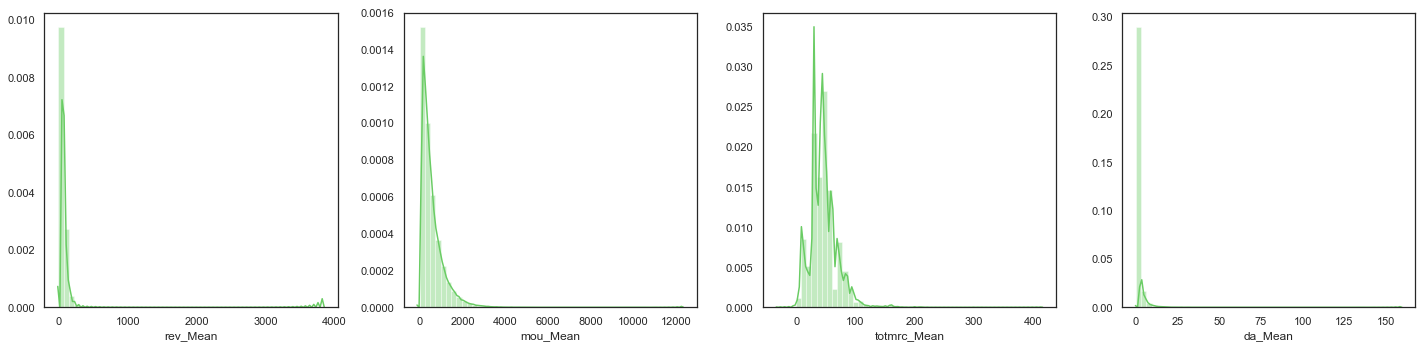

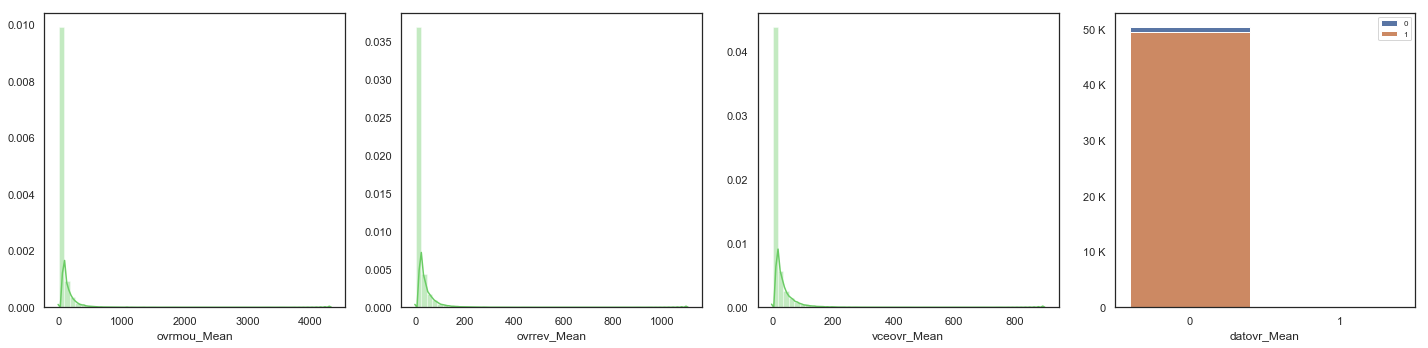

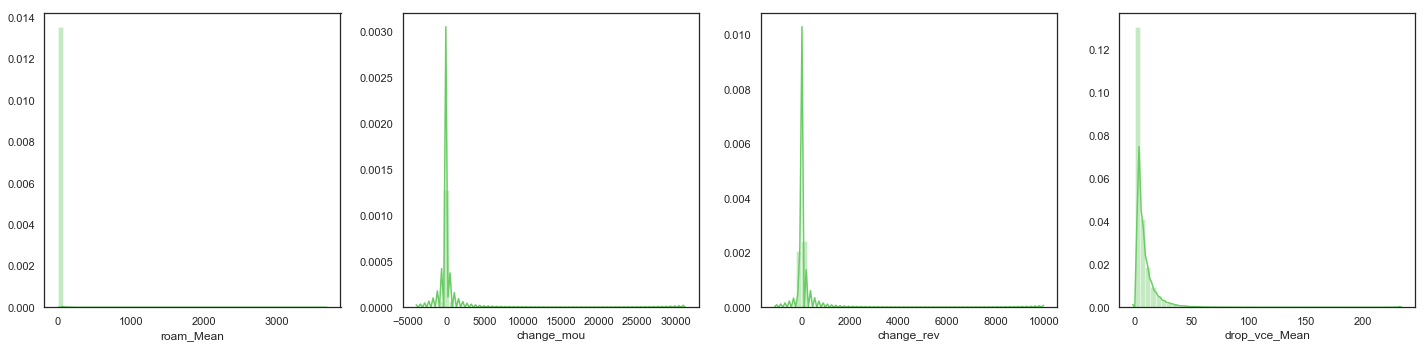

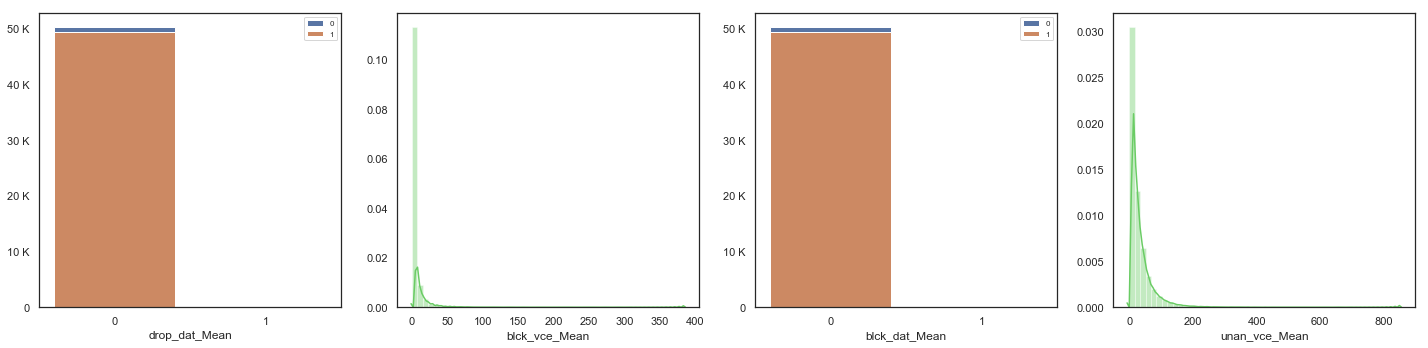

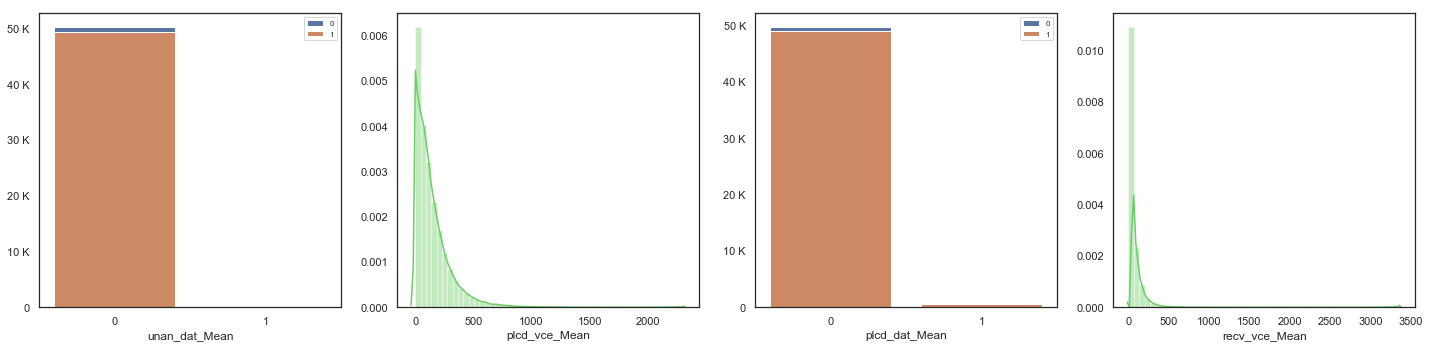

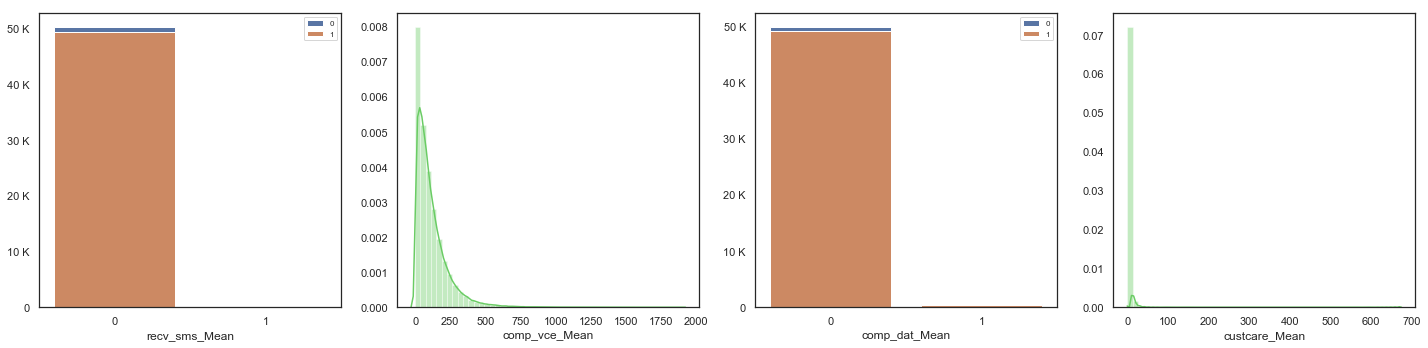

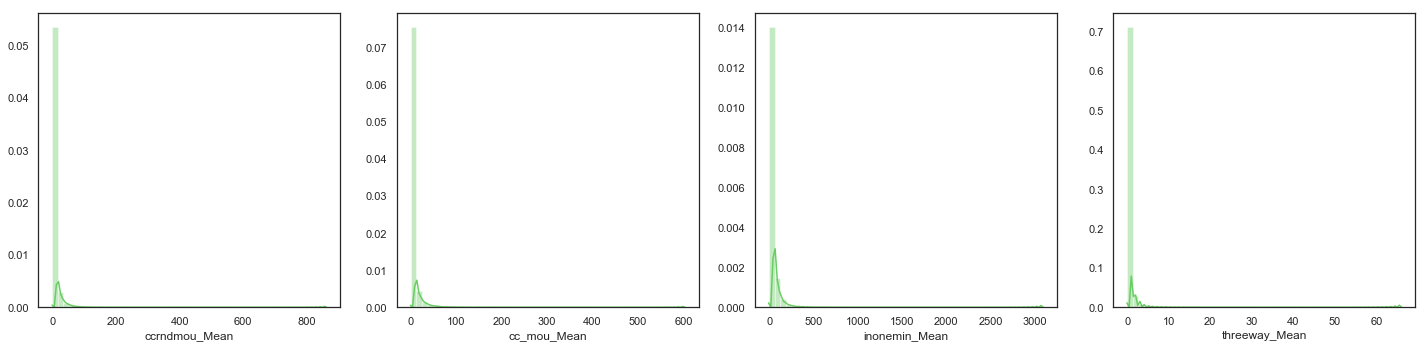

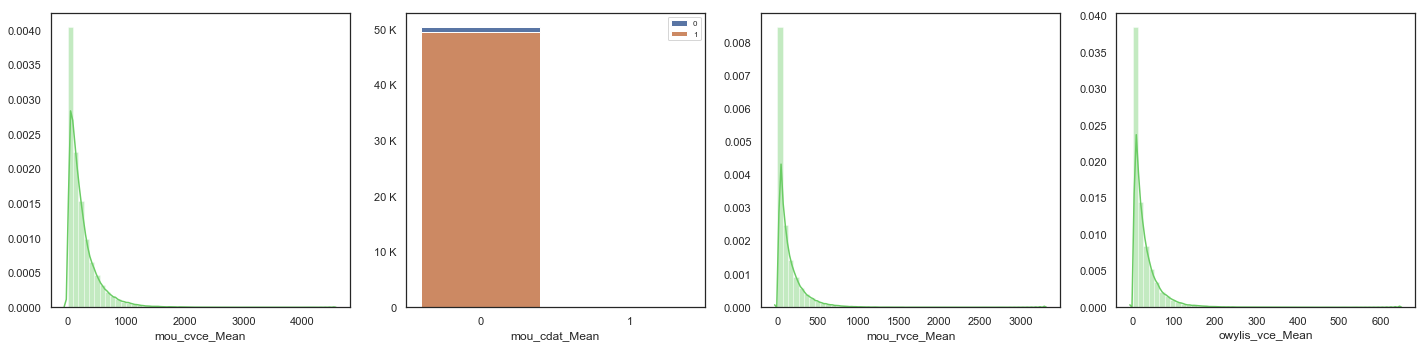

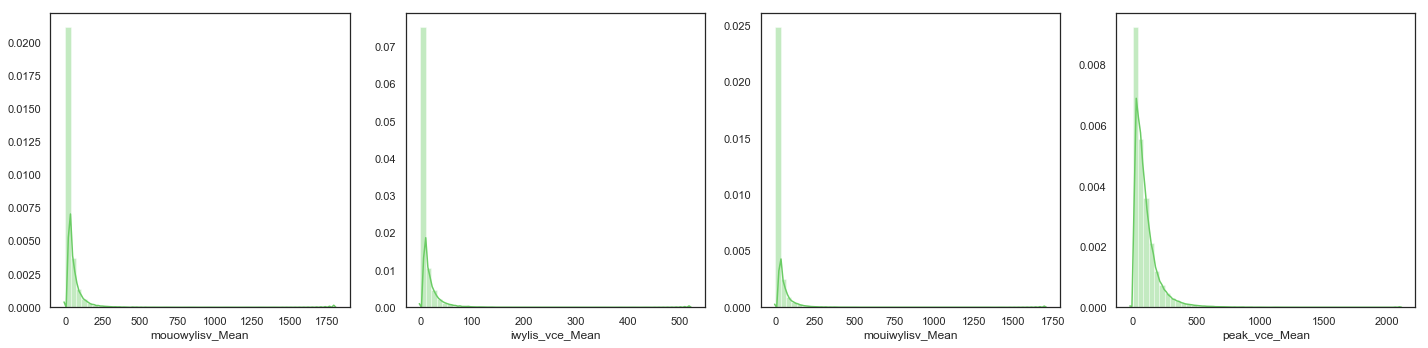

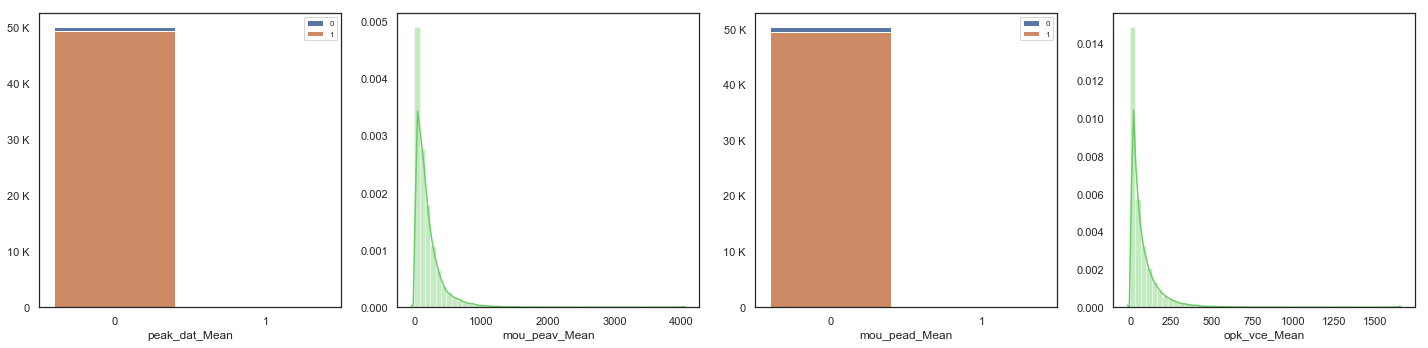

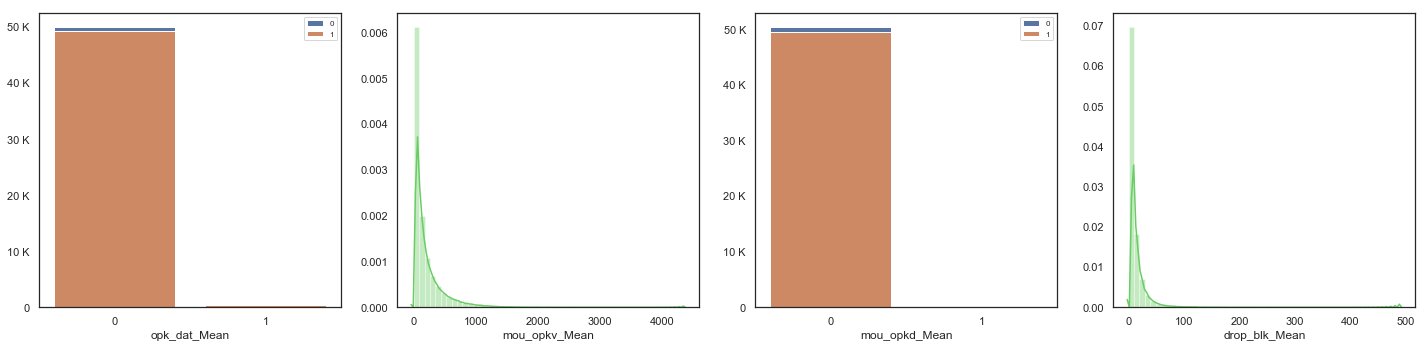

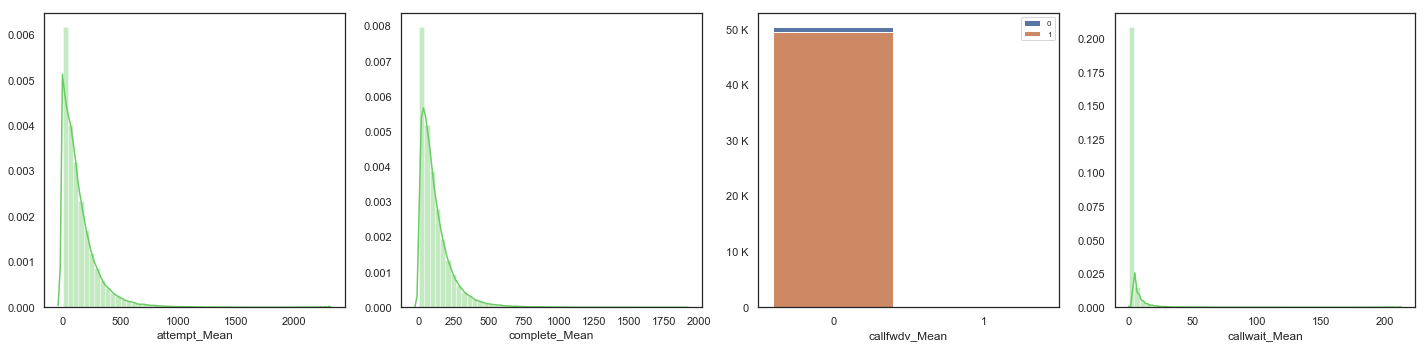

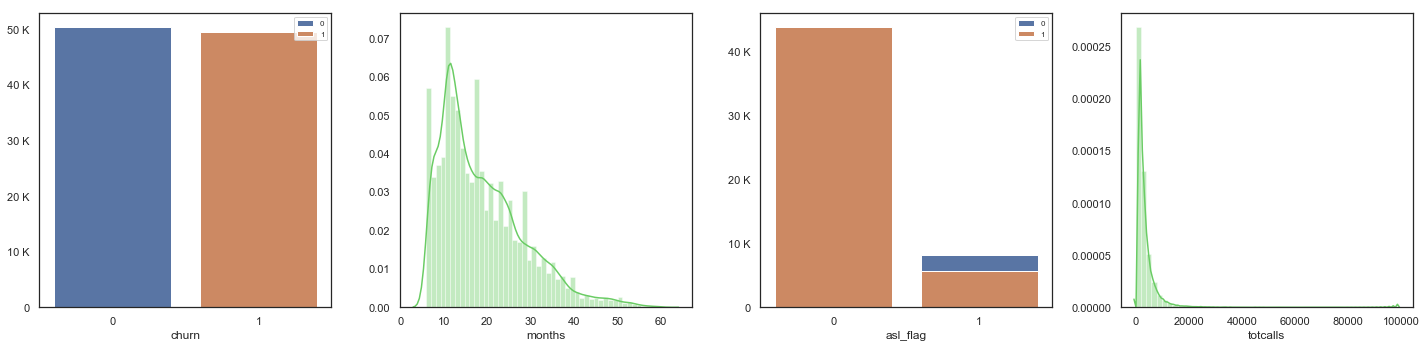

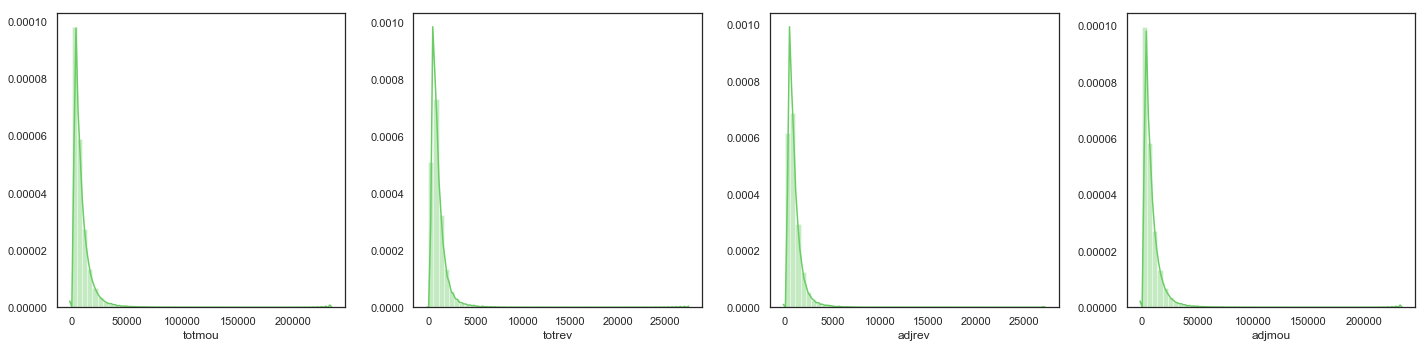

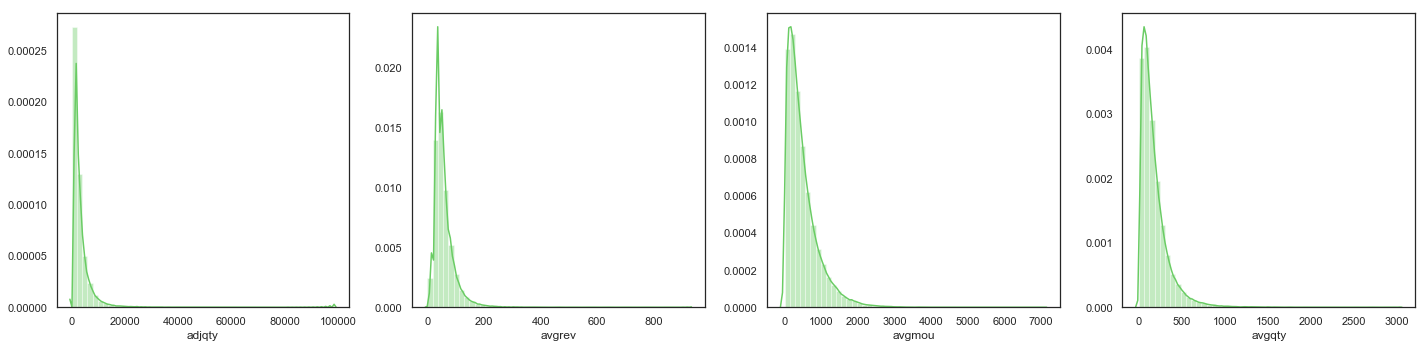

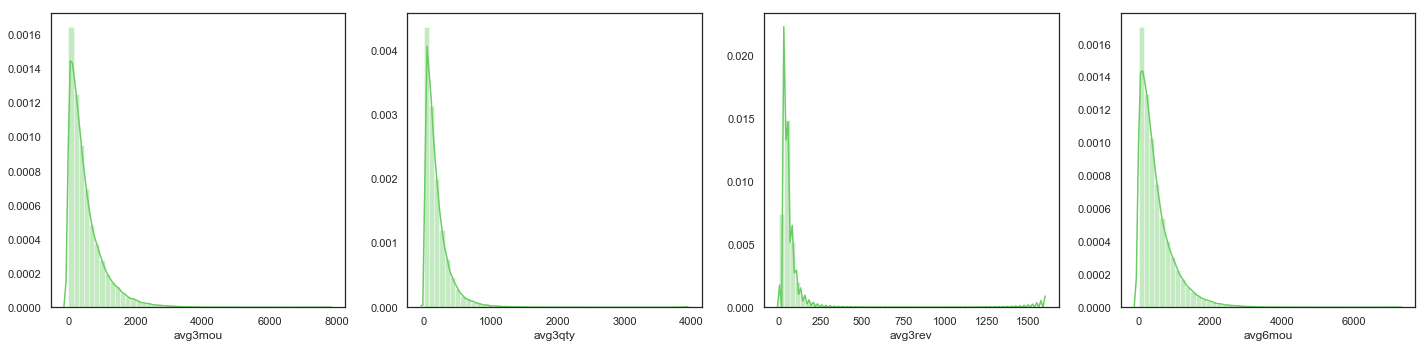

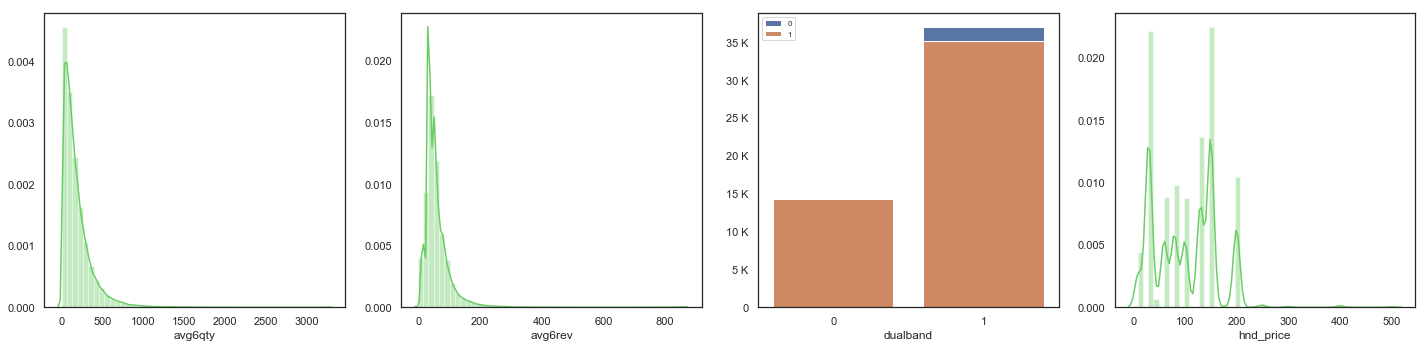

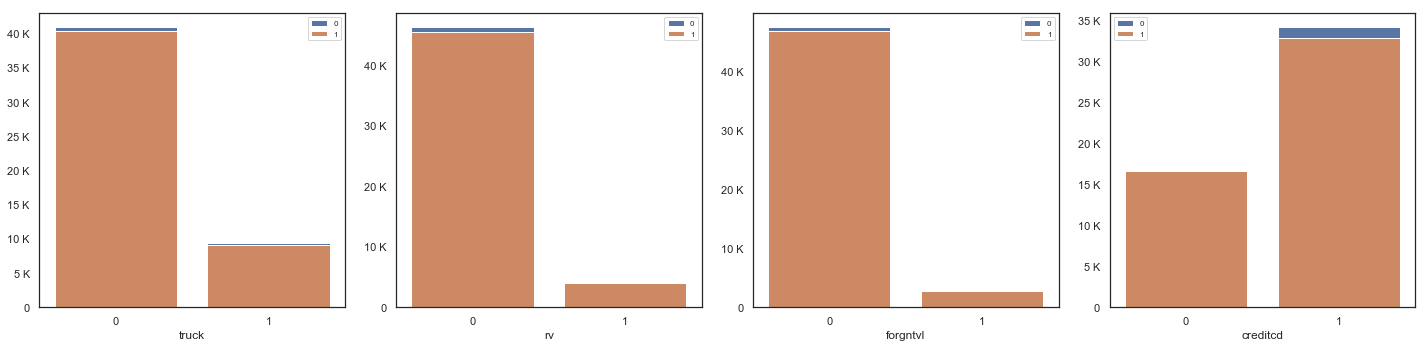

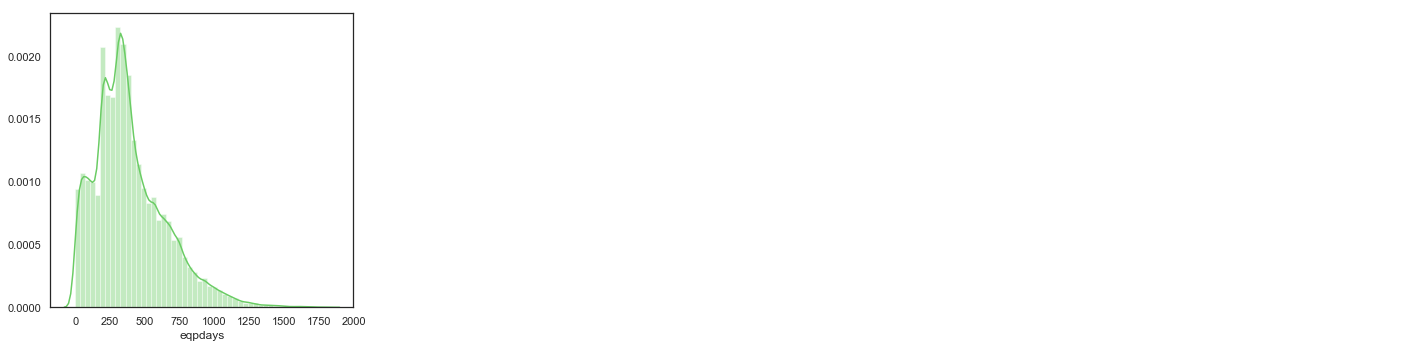

In [12]:
plot_dist(df, 'churn')

In [13]:
# Plot violin chart of columns, w.r.t. target label
def plot_violin(df, target):
    n = 0
    color_pal = sns.color_palette("muted")
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    for col in df:
        if df[col].dtype in numerics:
            pass
        else:
            continue
            
        if n % 5 == 0:
            plt.tight_layout()
            plt.show()
            f, axs = plt.subplots(ncols=5, figsize=(20, 4))
            n = 0
        
        ax = sns.violinplot(x=target, y=col, data=df[:10000],
           palette=["lightblue", "lightpink"], inner="quartile", ax=axs[n]);
        ax.get_xaxis().label.set_visible(False)
        n += 1
    
    for m in range(n, 5):
        axs[m].axis('off')
    
    plt.tight_layout()
    plt.show()

<Figure size 432x288 with 0 Axes>

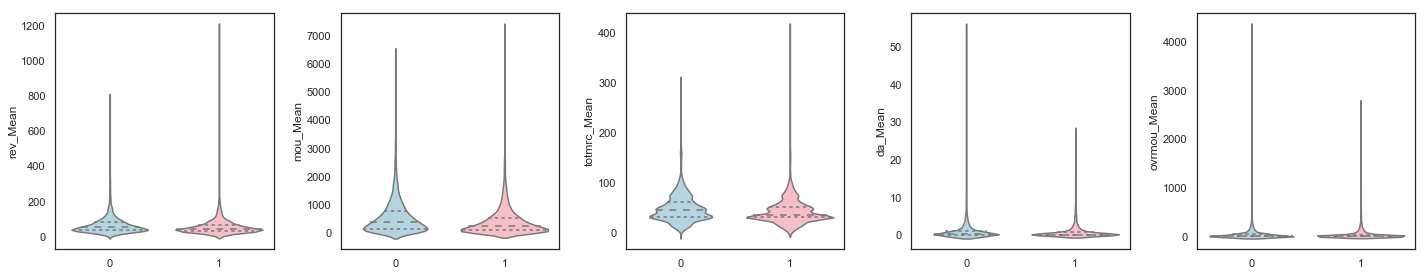

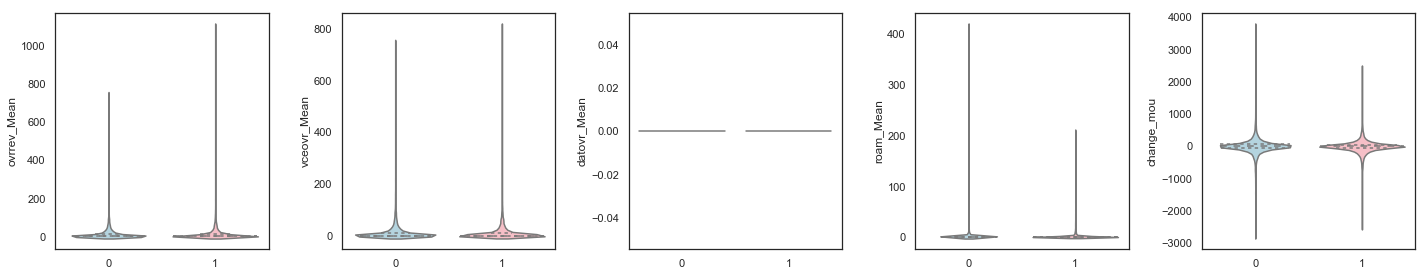

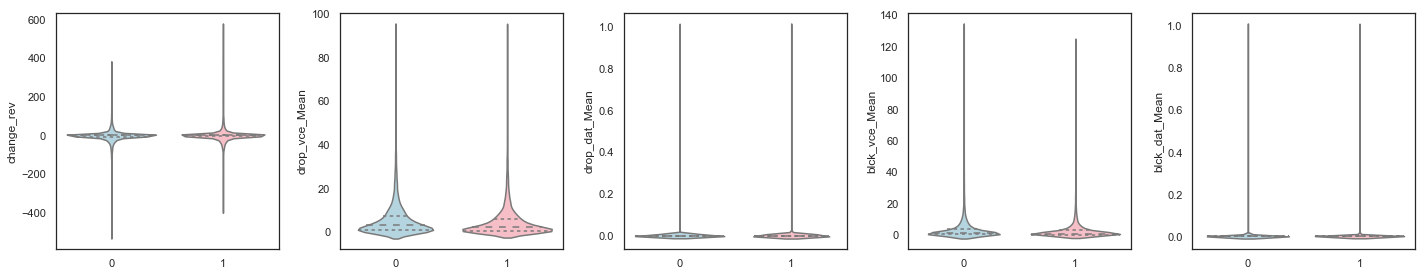

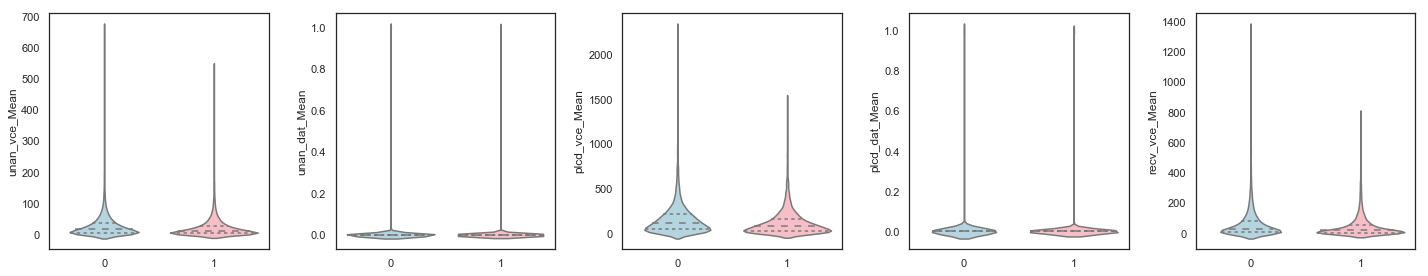

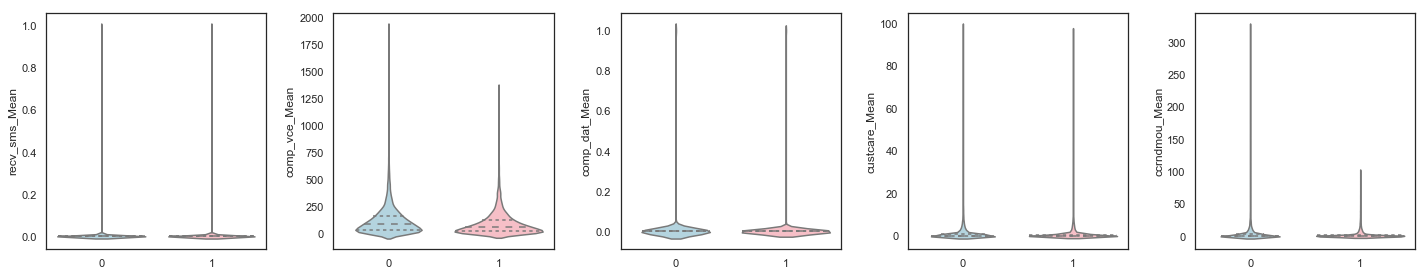

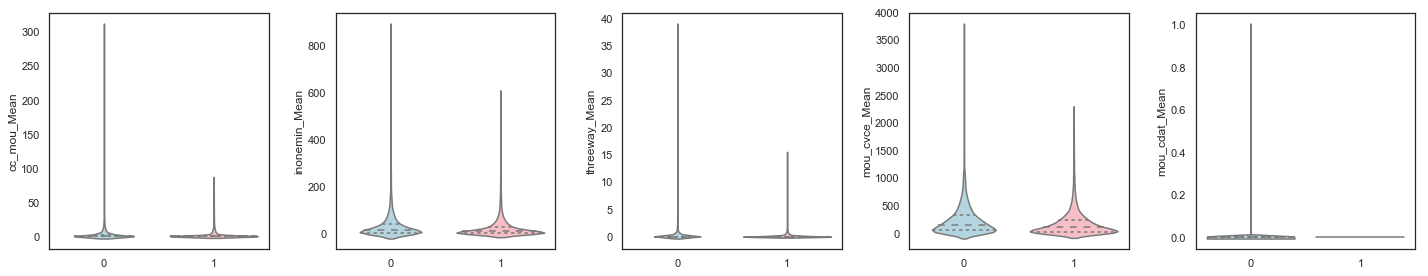

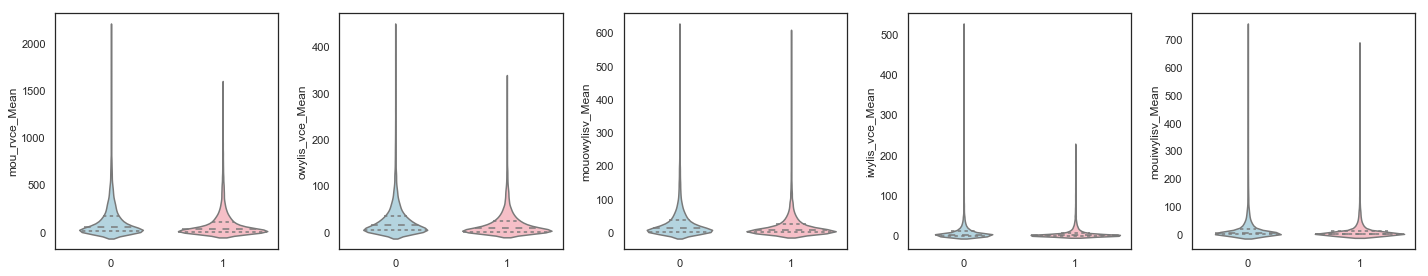

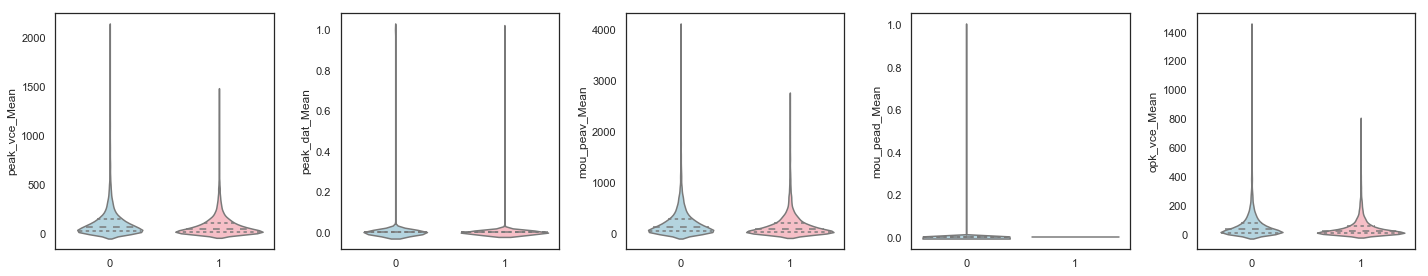

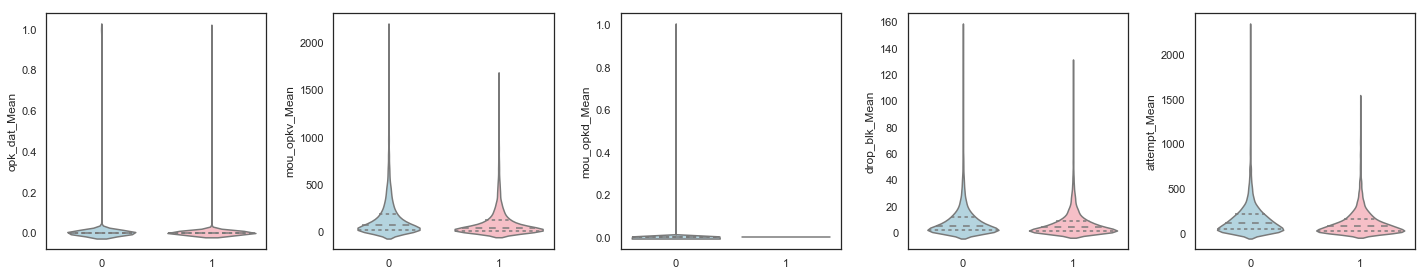

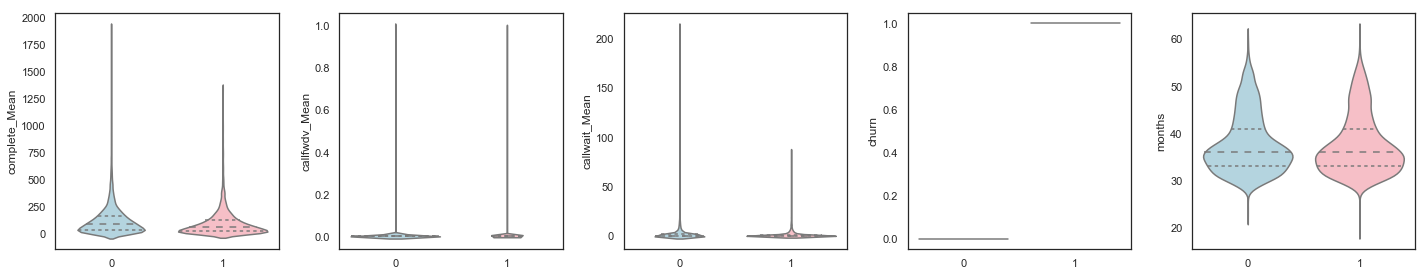

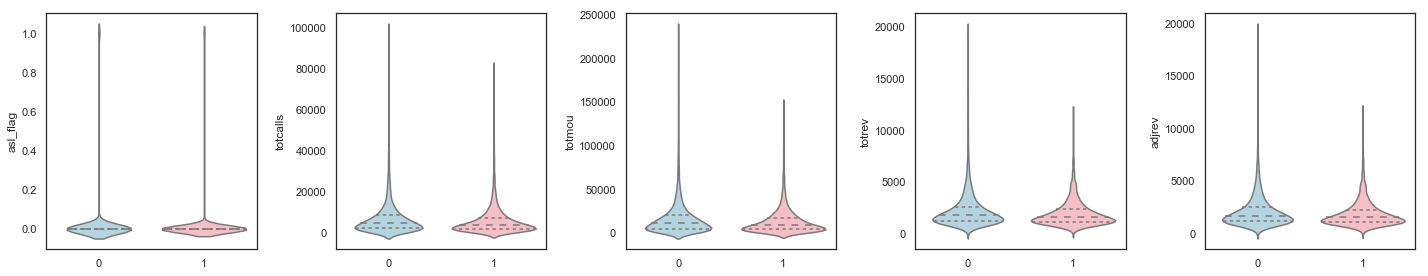

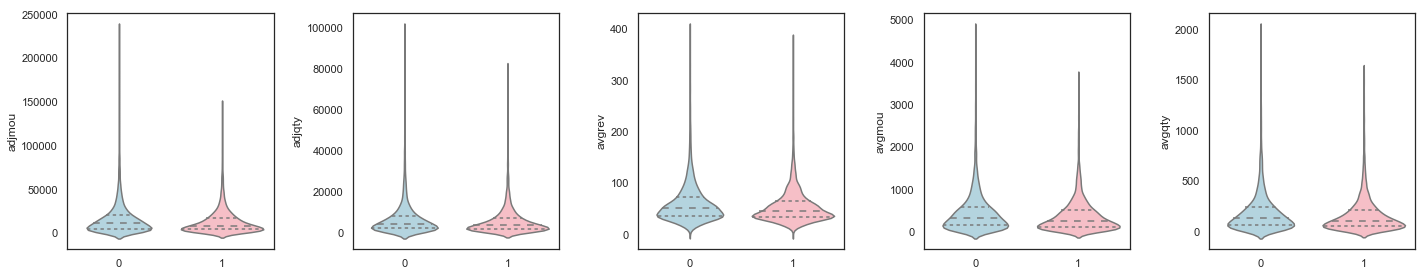

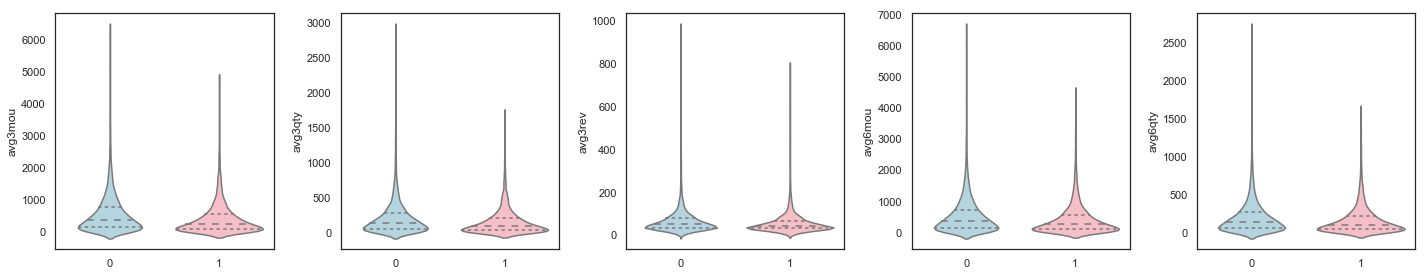

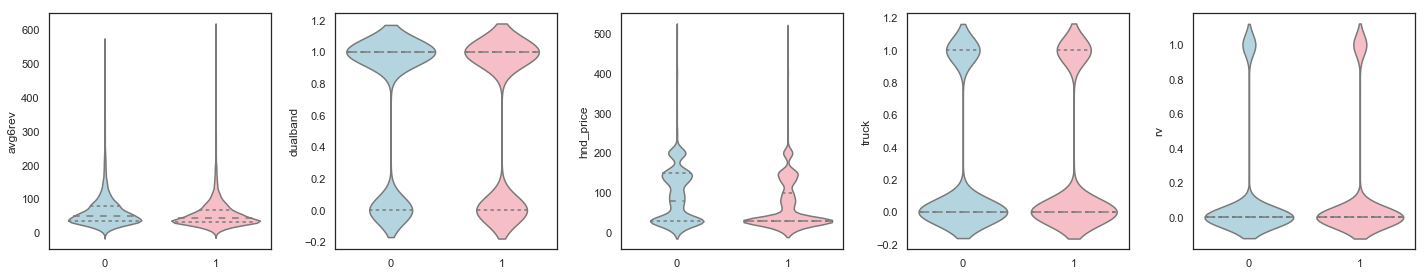

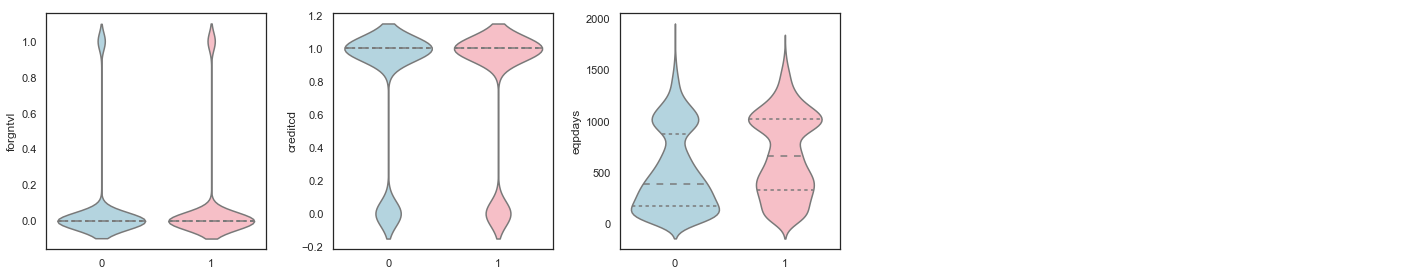

In [14]:
plot_violin(df, 'churn')

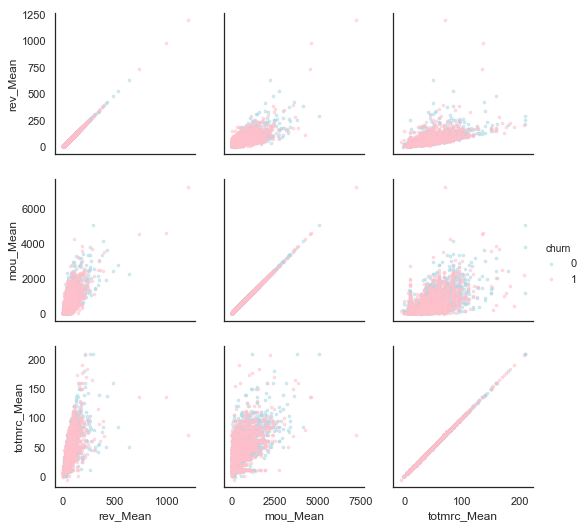

In [15]:
# Plot scatter charts of columns, w.r.t. target label
g = sns.PairGrid(df.sample(5000), vars=['rev_Mean', 'mou_Mean', 'totmrc_Mean'],
                 hue='churn', palette=["lightblue", "pink"])
g.map(plt.scatter, alpha=0.5, s=7)
g.add_legend();

# Comparing

In [16]:
# Split data randomly
df1 = df.sample(5000, random_state=123)
df2 = df.sample(1000, random_state=456)

display(df1.head())
display(df2.head())

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,...,numbcars_3,numbcars_Missing,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_Missing,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_Missing,dwllsize_N,dwllsize_O,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_Missing,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_U,kid0_2_Y,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y
42083,73.070000,521.250000,30.00,0.0000,106.750000,37.362500,37.362500,0,0.0000,110.750000,-3.870000,20.333333,0,1.333333,0,38.666667,0,196.666667,0,75.333333,0,143.333333,0,0.333333,1.000000,0.776667,44.000000,1.333333,302.526667,0,74.636667,12.333333,17.590000,0.000000,0.000000,119.000000,0,234.560000,0,77.666667,0,142.603333,0,21.666667,196.666667,143.333333,0,0.000000,1,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
71825,44.785000,407.000000,49.99,0.0000,0.000000,0.000000,0.000000,0,0.2575,-46.000000,4.145000,0.666667,0,0.333333,0,5.000000,0,21.333333,0,7.333333,0,15.666667,0,1.000000,2.000000,1.466667,4.000000,0.000000,48.880000,0,16.333333,7.000000,6.326667,2.000000,2.710000,7.000000,0,18.630000,0,13.333333,0,46.583333,0,1.000000,21.666667,16.000000,0,0.000000,0,12,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
99535,18.593333,27.666667,16.99,0.0000,9.333333,3.266667,3.266667,0,0.0000,50.333333,2.896667,0.000000,0,0.000000,0,0.333333,0,2.333333,0,0.000000,0,2.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.196667,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0,1.103333,0,0.333333,0,0.093333,0,0.000000,2.333333,2.000000,0,0.000000,0,29,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1
47879,38.637500,450.500000,43.70,0.0000,5.250000,2.100000,2.100000,0,0.0000,338.500000,4.752500,5.000000,0,0.333333,0,11.333333,0,127.666667,0,23.666667,0,112.000000,0,7.333333,13.333333,9.906667,8.333333,0.000000,357.836667,0,64.220000,20.000000,18.216667,1.333333,1.966667,49.333333,0,143.773333,0,82.000000,0,278.290000,0,5.333333,127.666667,112.000000,0,0.000000,0,14,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
36734,59.435000,939.750000,59.99,0.2475,24.250000,7.275000,7.275000,0,0.0000,196.250000,25.545000,12.666667,0,5.000000,0,46.333333,0,258.000000,0,91.333333,0,198.000000,0,4.000000,35.666667,33.233333,40.333333,0.000000,520.403333,0,194.170000,37.000000,36.303333,13.666667,24.306667,149.333333,0,375.133333,0,132.666667,0,339.436667,0,17.666667,258.000000,198.000000,0,4.333333,1,17,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,...,numbcars_3,numbcars_Missing,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_Missing,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_Missing,dwllsize_N,dwllsize_O,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_Missing,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_U,kid0_2_Y,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y
63592,95.6100,1220.00,66.0675,0.7425,84.50,33.80,33.80,0,0.0,551.00,95.0600,16.000000,0,1.333333,0,36.333333,0,177.000000,0,160.666667,0,132.000000,0,3.666667,9.333333,7.930000,71.333333,0.000000,318.083333,0,528.030000,50.333333,55.136667,27.666667,94.950000,168.666667,0,493.186667,0,102.000000,0,352.926667,0,17.333333,177.000000,132.000000,0,3.666667,1,14,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
43020,53.9600,135.75,50.0000,3.9600,0.00,0.00,0.00,0,0.0,4.25,0.0000,0.000000,0,1.333333,0,3.000000,0,32.333333,0,10.666667,0,28.000000,0,0.000000,0.000000,0.000000,6.666667,0.000000,41.923333,0,12.440000,8.333333,5.060000,1.666667,2.836667,23.333333,0,36.986667,0,15.333333,0,17.376667,0,1.333333,32.333333,28.000000,0,0.000000,1,21,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
19591,102.2375,842.00,34.9800,0.0000,207.25,66.32,66.32,0,0.0,-218.00,-25.3375,6.000000,0,5.666667,0,28.000000,0,205.666667,0,268.333333,0,169.333333,0,0.000000,0.000000,0.000000,143.333333,0.000000,204.150000,0,367.873333,14.666667,21.720000,7.333333,14.806667,311.333333,0,399.256667,0,123.000000,0,172.766667,0,11.666667,205.666667,169.333333,0,2.666667,1,27,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
51670,60.2375,143.25,69.9900,0.2475,0.00,0.00,0.00,0,0.0,-45.25,-0.2475,5.333333,0,2.333333,0,7.333333,0,39.666667,0,4.000000,0,25.333333,0,0.000000,0.000000,0.000000,2.666667,0.000000,87.516667,0,1.656667,7.000000,9.873333,0.666667,1.356667,18.000000,0,45.893333,0,9.666667,0,43.280000,0,7.666667,39.666667,25.333333,0,0.000000,1,14,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
59284,53.4600,1062.75,59.1450,0.0000,0.00,0.00,0.00,0,0.0,456.25,10.5300,6.000000,0,1.666667,0,18.666667,0,119.000000,0,6.333333,0,92.666667,0,0.333333,0.666667,0.656667,2.666667,0.666667,681.436667,0,79.336667,8.666667,34.410000,0.333333,0.026667,20.333333,0,113.700000,0,78.666667,0,647.073333,0,7.666667,119.000000,92.666667,0,0.000000,0,11,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [17]:
# Compare two data sets
cleanser.compare(df1, df2.drop(['rev_Mean', 'mou_Mean', 'totmrc_Mean'], axis=1))

Comparing DFs
Shape of DF1: (5000, 260)
Shape of DF2: (1000, 257)

DF1 does not has columns []
DF2 does not has columns ['mou_Mean', 'totmrc_Mean', 'rev_Mean']



-------
# ML Models

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

Accuracy: 0.50885
RMSE: 0.23722923086929348


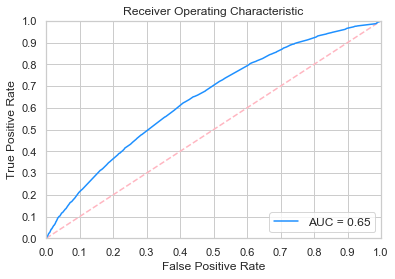

In [19]:
# Quick ML model training and evaluating
# See Analyze.ipynb for more
classifier = tree.DecisionTreeClassifier(max_depth=9)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
analyzer.evaluate(y_test, y_score, 1)